# Creating Pivot Tables
---

## **Excel:**

*   Created on Ribbon -> Insert

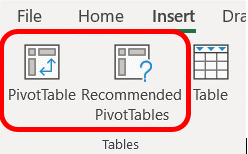

## **Python:**



*   Uses pd.pivot_table() 
*   Assumes dataframe


    pd.pivot_table(df
               , index='Rows'              # Rows box in Excel
               , columns='Columns'         # Columns Box in Excel
               , values='Values'           # Values box in Excel (choose variable to aggregate)
               , aggfunc=np.sum)           # Value Field Settings window in Excel (default is mean)


OR 

    df.pivot_table()



<br>

### Load required packages and data

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Save Github location paths to a variable
census_path = 'https://github.com/The-Calculated-Life/python_analysis_for_excel/blob/main/data/census_data.xlsx?raw=true'

# Read excel and CSV files
census = pd.read_excel(census_path)

from vega_datasets import data
cars = data.cars()
cars['Year'] = cars['Year'].dt.year

<br>

### Excel Demo: Use `cars` dataframe to build simple pivot table in Excel
---

In [3]:
# Preview cars dataframe
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970,USA


<br>

In [4]:
# Create pivot table with Cylinders on rows (index)
pd.pivot_table(cars
               , index='Cylinders')

,Acceleration,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs,Year
Cylinders,,,,,,
3,13.250000,72.500000,99.250000,20.550000,2398.500000,1975.500000
4,16.616425,109.900966,78.470297,29.286765,2312.685990,1977.135266
5,18.633333,145.000000,82.333333,27.366667,3103.333333,1979.000000
6,16.263095,218.142857,101.506024,19.985714,3198.226190,1976.011905
8,12.837037,345.203704,158.453704,14.963107,4105.194444,1973.731481


<br>

In [5]:
# Create pivot table with Cylinders on columns
pd.pivot_table(cars
               , columns='Cylinders')

Cylinders,3,4,5,6,8
Acceleration,13.25,16.616425,18.633333,16.263095,12.837037
Displacement,72.50,109.900966,145.000000,218.142857,345.203704
Horsepower,99.25,78.470297,82.333333,101.506024,158.453704
Miles_per_Gallon,20.55,29.286765,27.366667,19.985714,14.963107
Weight_in_lbs,2398.50,2312.685990,3103.333333,3198.226190,4105.194444
Year,1975.50,1977.135266,1979.000000,1976.011905,1973.731481


<br>

In [6]:
# Create pivot table which returns averages for variables broken out by Origin (columns) and Cylinders (index)
cars.pivot_table(columns='Origin'
                , index='Cylinders')

Acceleration                        ...    Year                          
Origin          Europe      Japan        USA  ...  Europe        Japan          USA
Cylinders                                     ...                                  
3                  NaN  13.250000        NaN  ...     NaN  1975.500000          NaN
4            16.763636  16.569565  16.526389  ...  1975.5  1977.652174  1978.138889
5            18.633333        NaN        NaN  ...  1979.0          NaN          NaN
6            16.425000  13.550000  16.474324  ...  1978.5  1978.333333  1975.689189
8                  NaN        NaN  12.837037  ...     NaN          NaN  1973.731481

[5 rows x 18 columns]

<br>

In [7]:
# Create pivot table which counts the number of cars created by Origin (columns) and Cylinders (index)
cars.pivot_table(columns='Origin'
                , index='Cylinders'
                , values='Name'
                , aggfunc='count')

Origin,Europe,Japan,USA
Cylinders,,,
3,NaN,4.0,NaN
4,66.0,69.0,72.0
5,3.0,NaN,NaN
6,4.0,6.0,74.0
8,NaN,NaN,108.0


<br>

In [9]:
# Create pivot table which counts the number of cars created by Origin and Cylinders (include fill_value, margins, margins_name)
cars.pivot_table(columns='Origin'
                , index='Cylinders'
                , values='Name'
                , aggfunc='count'
                , fill_value=0
                , margins=True
                , margins_name='Grand Total')

Origin,Europe,Japan,USA,Grand Total
Cylinders,,,,
3,0,4,0,4
4,66,69,72,207
5,3,0,0,3
6,4,6,74,84
8,0,0,108,108
Grand Total,73,79,254,406


<br><br>
##### **QUICK CHALLENGE #1: Build a pivot table**

**Task:**

*   Use the `cars` dataframe to construct a pivot table which shows the average `Miles_per_Gallon` broken down by `Year` and `Cylinders`.
*   Include subtotal margins

In [12]:
# Your code for quick challenge #1 here:
cars.pivot_table(columns='Cylinders'
                , index='Year'
                , values='Miles_per_Gallon'
                , aggfunc='mean'
                , margins=True
                , margins_name='Grand Average')

Cylinders,3,4,5,6,8,Grand Average
Year,,,,,,
1970,NaN,25.285714,NaN,20.500000,14.111111,17.689655
1971,NaN,27.461538,NaN,18.000000,13.428571,21.250000
1972,19.00,23.428571,NaN,NaN,13.615385,18.714286
1973,18.00,22.727273,NaN,19.000000,13.200000,17.100000
1974,NaN,27.800000,NaN,17.857143,14.200000,22.703704
1975,NaN,25.250000,NaN,17.583333,15.666667,20.266667
1976,NaN,26.766667,NaN,20.000000,14.666667,21.573529
1977,21.50,29.107143,NaN,19.500000,16.000000,23.375000
1978,NaN,29.576471,20.300000,19.066667,19.050000,24.061111


<br><br>

# Pivoting on multiple rows/columns
---

In [13]:
# Another example: Census pivot table of total employment by male/female, age, industry (view data)
census.head()

,state,industry,sex,age,firmsize,employment,turnover,avg_employee_earnings
0,Montana,Agriculture,Male,14-18,0-19 Employees,99.0,0.185,963.0
1,Montana,Agriculture,Male,19-21,0-19 Employees,151.0,0.190,2240.0
2,Montana,Agriculture,Male,22-24,0-19 Employees,171.0,0.148,2704.0
3,Montana,Agriculture,Male,25-34,0-19 Employees,656.0,0.108,3405.0
4,Montana,Agriculture,Male,35-44,0-19 Employees,593.0,0.095,4071.0


<br>

In [14]:
# Another example: Census pivot table of total employment by male/female, age, industry
census.pivot_table(index='industry'
                  , columns=['sex', 'age']
                  , values='employment'
                  , aggfunc='sum')

sex                                    Female            ...       Male          
age                                     14-18     19-21  ...      55-64     65-99
industry                                                 ...                     
Accommodation and Food Services      803685.0  903280.0  ...   611031.0  321173.0
Administrative Services               37674.0  175213.0  ...   788082.0  350694.0
Agriculture                           14595.0   16062.0  ...   154217.0   95905.0
Arts, Entertainment, and Recreation   83394.0   99008.0  ...   164439.0  115487.0
Construction                          13948.0   28498.0  ...   994043.0  295487.0
Educational Services                  37659.0   90319.0  ...   191939.0  115775.0
Finance and Insurance                  7072.0   55204.0  ...   378971.0  125284.0
Health Care                          104292.0  430280.0  ...   769614.0  359179.0
Information                           18905.0   30985.0  ...   261895.0   84812.0
Management of Companies               14096.0   33467.0  ...   221085.0   59205.0
Manufacturing                         27785.0   83564.0  ...  1941802.0  448656.0
Mining                                  327.0    1135.0  ...    93342.0   22144.0
Other Services                        48962.0  119007.0  ...   383562.0  184016.0
Professional Services                 22519.0   80830.0  ...   805824.0  309778.0
Public Administration                     0.0       0.0  ...        0.0       0.0
Real Estate                            8032.0   24360.0  ...   246495.0  116502.0
Retail Trade                         369880.0  795909.0  ...  1076381.0  560927.0
Transportation and Warehousing        12767.0   58309.0  ...   729957.0  241506.0
Utilities                                83.0     749.0  ...    98119.0   14391.0
Wholesale Trade                       10566.0   33516.0  ...   805864.0  258963.0

[20 rows x 16 columns]

<br>

In [15]:
# Pivot employment/turnover by industry and male/female, provide sum and mean
census.pivot_table(index='industry'
                  , columns=['sex']
                  , values=['employment', 'turnover']
                  , aggfunc=['sum', 'mean'])

sum             ...      mean          
                                     employment             ...  turnover          
sex                                      Female       Male  ...    Female      Male
industry                                                    ...                    
Accommodation and Food Services       7272793.0  6269759.0  ...  0.157647  0.159803
Administrative Services               4029791.0  5273453.0  ...  0.191798  0.190913
Agriculture                            443620.0   834966.0  ...  0.122678  0.116924
Arts, Entertainment, and Recreation   1129902.0  1208459.0  ...  0.135420  0.130669
Construction                          1260772.0  6083209.0  ...  0.122322  0.140153
Educational Services                  1869534.0  1117651.0  ...  0.136270  0.133417
Finance and Insurance                 3477614.0  2419782.0  ...  0.095623  0.095833
Health Care                          15178617.0  4265865.0  ...  0.131735  0.121744
Information                           1150682.0  1837618.0  ...  0.115267  0.108872
Management of Companies               1244106.0  1188568.0  ...  0.112751  0.108152
Manufacturing                         3649997.0  8810375.0  ...  0.120346  0.114001
Mining                                 102471.0   562200.0  ...  0.061461  0.115555
Other Services                        2351228.0  2139389.0  ...  0.127017  0.125963
Professional Services                 4260975.0  5025046.0  ...  0.118625  0.115689
Public Administration                       1.0        0.0  ...  0.000000       NaN
Real Estate                            958201.0  1259214.0  ...  0.121136  0.121668
Retail Trade                          7750154.0  7563386.0  ...  0.141875  0.127152
Transportation and Warehousing        1556567.0  3655539.0  ...  0.132856  0.140998
Utilities                              126840.0   400020.0  ...  0.037662  0.054885
Wholesale Trade                       1796986.0  3997851.0  ...  0.113432  0.107512

[20 rows x 8 columns]

<br><br>
##### **QUICK CHALLENGE #2: Pivot data on multiple rows/columns**

**Task:**

*   Use the `census` dataframe to construct a pivot table which shows the average `avg_employee_earnings`
*   Break the results down by `state` (index) and `sex`, `firmsize` (columns).


In [16]:
# Your code for quick challenge #2 here:
census.pivot_table(index='state'
                  , columns=['sex', 'firmsize']
                  , values=['avg_employee_earnings']
                  , aggfunc=['mean'])

mean  ...               
                     avg_employee_earnings  ...               
sex                                 Female  ...           Male
firmsize                    0-19 Employees  ... 500+ Employees
state                                       ...               
Alabama                        2223.258278  ...    4388.703947
Arizona                        2680.953020  ...    4795.205298
California                     3317.407895  ...    6507.470199
Colorado                       2858.236842  ...    5102.231788
Connecticut                    3143.205479  ...    6145.218543
Delaware                       2368.826087  ...    4803.601351
District of Columbia           4448.617188  ...    8598.053030
Florida                        2624.434211  ...    4919.197368
Georgia                        2509.993289  ...    5309.743421
Hawaii                         2732.125874  ...    4753.240000
Idaho                          2130.283784  ...    4541.079470
Illinois                       2589.934211  ...    5747.539474
Indiana                        2218.940789  ...    4783.660000
Iowa                           2195.716216  ...    4729.486667
Kansas                         2200.618421  ...    4408.052980
Kentucky                       2218.020408  ...    4844.500000
Louisiana                      2398.980263  ...    5009.133333
Maine                          2265.220690  ...    4455.283784
Maryland                       3080.533333  ...    5813.649007
Massachusetts                  3201.133333  ...    7354.797297
Michigan                       2390.238411  ...    5041.927632
Minnesota                      2551.386667  ...    5579.260000
Missouri                       2196.675676  ...    4971.815789
Montana                        2085.446667  ...    4810.231788
Nebraska                       2204.493243  ...    4530.613333
Nevada                         2901.422819  ...    5178.223684
New Hampshire                  2716.945578  ...    5682.229730
New Jersey                     2784.549669  ...    6291.460526
New Mexico                     2349.629139  ...    4511.268456
New York                       3178.132450  ...    7049.197368
North Carolina                 2420.369128  ...    5006.153333
North Dakota                   2488.828767  ...    5685.295302
Ohio                           2283.065789  ...    4963.960526
Oklahoma                       2342.675497  ...    4881.410596
Oregon                         2480.443709  ...    4928.393333
Pennsylvania                   2484.243421  ...    5440.192053
Rhode Island                   3229.678322  ...    4853.397163
South Carolina                 2541.753333  ...    4502.688742
South Dakota                   2141.187919  ...    4522.456376
Tennessee                      2623.295302  ...    4982.178808
Texas                          2791.131579  ...    5862.039474
Utah                           2224.622517  ...    5069.738562
Vermont                        2423.118056  ...    4784.638889
Virginia                       2496.280000  ...    5519.132450
Washington                     2661.688742  ...    6358.633333
West Virginia                  1957.899329  ...    4776.059603
Wisconsin                      2282.040000  ...    5462.668874
Wyoming                        2423.183673  ...    5365.816327

[48 rows x 10 columns]